In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Step 1: Load the dataset
url = "/kaggle/input/dos-attack-http-dataset/DoS_Attack_HTTP_Dataset.csv"
data = pd.read_csv(url)

# 5'ten az benzersiz değere sahip sütunları bulma
columns_with_few_unique = [col for col in data.columns if data[col].nunique() < 5]
# Bu sütunları görüntüleme
print("5'ten az benzersiz değere sahip sütunlar:", columns_with_few_unique)
# Sadece 1 benzersiz değere sahip sütunları belirleme
columns_with_single_value = [col for col in data.columns if data[col].nunique() == 1]
# Bu sütunları DataFrame'den çıkartma
data = data.drop(columns=columns_with_single_value)

data = data.drop("Flow_ID", axis = 1)

print(data.isnull().sum().sum())
null_columns = data.columns[data.isnull().any()].tolist()
# KNNImputer uygulama
knn_imputer = KNNImputer(n_neighbors=5)
data[null_columns] = knn_imputer.fit_transform(data[null_columns])


# Sayısal sütunları seçme
numeric_columns = data.select_dtypes(include=[np.number]).columns
print((np.isinf(data[numeric_columns])).sum().sum())
# Sayısal sütunlardaki sonsuz değerleri tespit etme
inf_columns = [col for col in numeric_columns if np.isinf(data[col]).any()]
# Sonsuz değerleri NaN ile değiştirme
data[inf_columns] = data[inf_columns].replace([np.inf, -np.inf], np.nan)
# NaN olan sütunları tespit etme
null_columns = data.columns[data.isnull().any()].tolist()
# KNNImputer ile NaN değerlerini doldurma
knn_imputer = KNNImputer(n_neighbors=5)
data[null_columns] = knn_imputer.fit_transform(data[null_columns])
# Sonuçları kontrol etme
print(data.isnull().sum().sum())  # Kalan NaN değerlerini kontrol etme
print((np.isinf(data[numeric_columns])).sum().sum())

print(data["Timestamp"].unique())
data["Timestamp"] = data["Timestamp"].str.replace("04/06/2018 01:", "", regex=False).str.replace(" AM", "", regex=False)
data["Seconds"] = data["Timestamp"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))
min_seconds = data["Seconds"].min()
# Tüm değerleri en küçük değere göre yeniden ayarlama
data["Adjusted_Timestamp"] = data["Seconds"] - min_seconds
data = data.drop(columns = ["Timestamp", "Seconds"], axis = 1)

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

# LabelEncoder örneği oluşturma
label_encoder = LabelEncoder()
# Kategorik sütunlara Label Encoding uygulama
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
# Sonuçları görüntüleme
print(data.head())

5'ten az benzersiz değere sahip sütunlar: ['Protocol', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min', 'Label', 'Cat', 'Sub_Cat']
3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:499: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(distances, out=distances)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:499: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(distances, out=distances)


3
0
0
['04/06/2018 01:02:02 AM' '04/06/2018 01:02:09 AM'
 '04/06/2018 01:02:10 AM' '04/06/2018 01:02:11 AM'
 '04/06/2018 01:02:12 AM' '04/06/2018 01:02:16 AM'
 '04/06/2018 01:02:08 AM' '04/06/2018 01:02:19 AM'
 '04/06/2018 01:02:22 AM' '04/06/2018 01:02:23 AM'
 '04/06/2018 01:02:30 AM' '04/06/2018 01:02:34 AM'
 '04/06/2018 01:02:37 AM' '04/06/2018 01:02:28 AM'
 '04/06/2018 01:02:32 AM' '04/06/2018 01:02:48 AM'
 '04/06/2018 01:02:36 AM' '04/06/2018 01:02:38 AM'
 '04/06/2018 01:02:41 AM' '04/06/2018 01:02:44 AM'
 '04/06/2018 01:02:51 AM' '04/06/2018 01:02:58 AM'
 '04/06/2018 01:02:57 AM' '04/06/2018 01:01:05 AM'
 '04/06/2018 01:01:06 AM' '04/06/2018 01:02:50 AM'
 '04/06/2018 01:03:02 AM' '04/06/2018 01:03:03 AM'
 '04/06/2018 01:03:05 AM' '04/06/2018 01:03:04 AM'
 '04/06/2018 01:03:08 AM' '04/06/2018 01:03:11 AM'
 '04/06/2018 01:03:12 AM' '04/06/2018 01:02:59 AM'
 '04/06/2018 01:03:00 AM' '04/06/2018 01:03:01 AM'
 '04/06/2018 01:03:09 AM' '04/06/2018 01:03:06 AM'
 '04/06/2018 01:03:24 AM'


Evaluating Random Forest...
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC: 1.0000


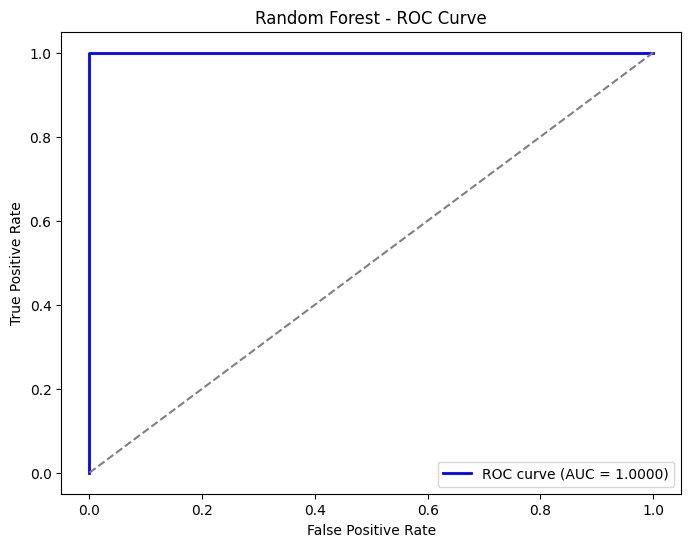

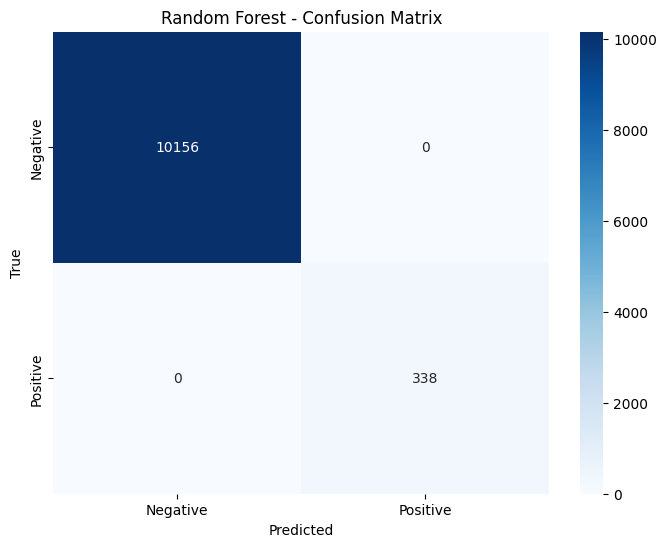


Evaluating SVM...
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC: 1.0000


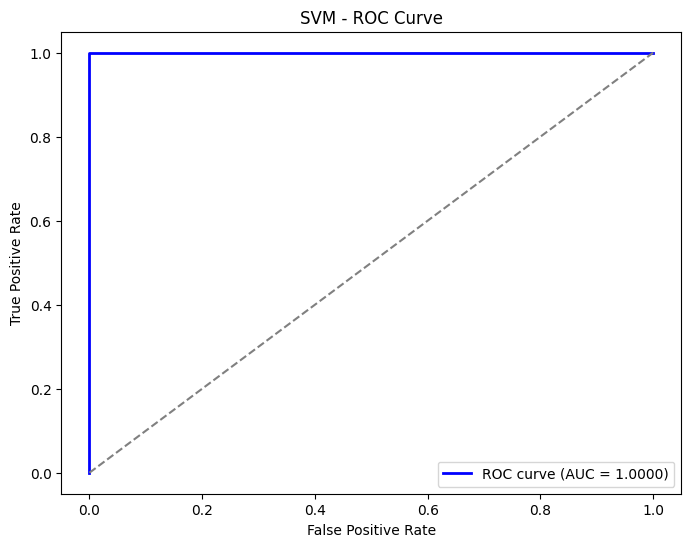

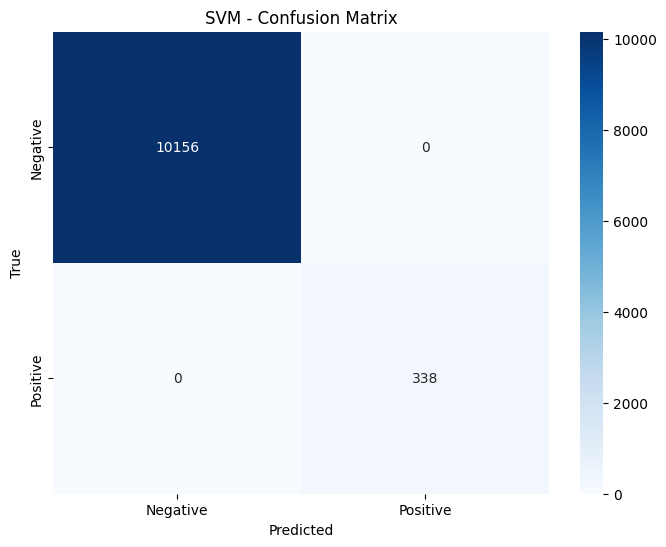


Evaluating XGBoost...
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC: 1.0000


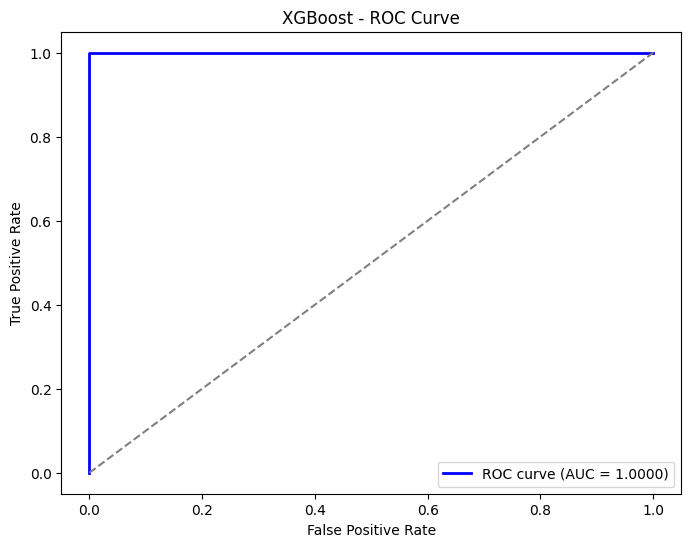

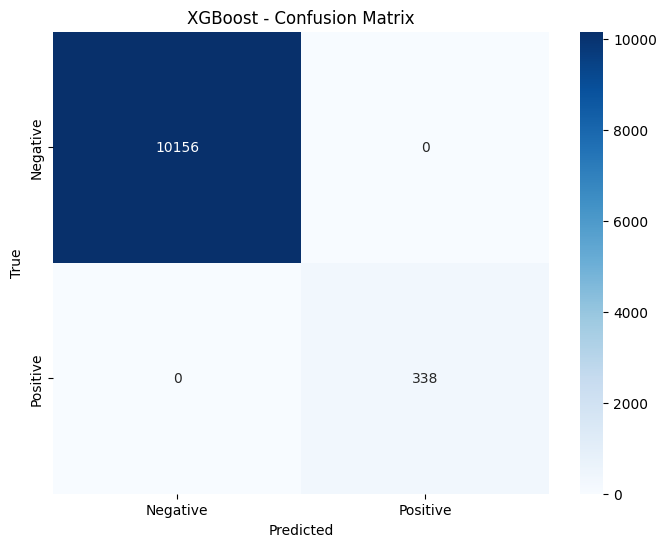


Evaluating LightGBM...
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC: 1.0000


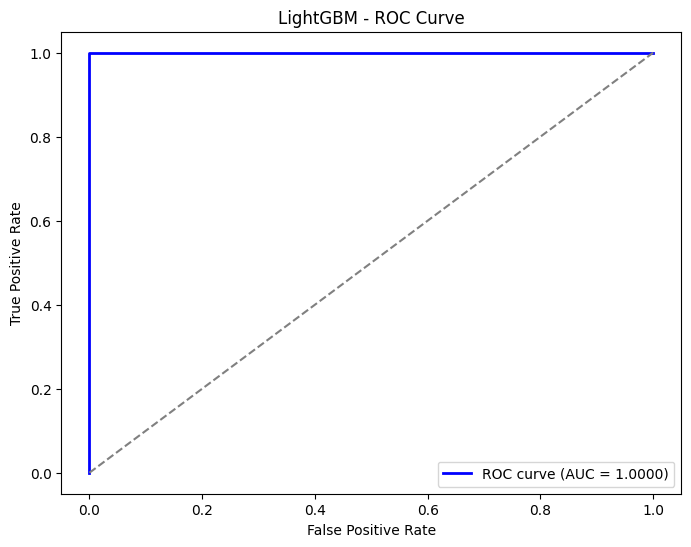

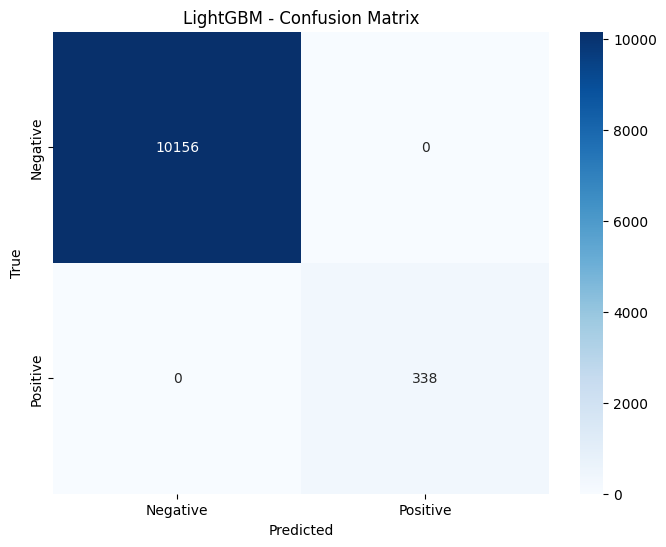

In [2]:
# Modelleri bir listeye koyma (sadece geleneksel modeller)
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("SVM", SVC(random_state=42, probability=True)),  # SVM için probability=True, ROC hesaplamak için
    ("XGBoost", xgb.XGBClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, verbosity=-1))
]

# Özellikler (X) ve hedef değişken (y)
X = data.drop("Label", axis=1)  # 'Label' hedef sütunu yerine doğru hedefi kullanın
y = data["Label"]  # 'Label' hedef sütunu yerine doğru hedefi kullanın

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Veriyi 3 boyutlu hale getirme (her özellik için bir zaman adımı)
X_train_scaled_3d = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled_3d = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Modelleri eğitme ve değerlendirme (geleneksel modeller)
for model_name, model in models:
    print(f"\nEvaluating {model_name}...")
    
    # Modeli eğitme
    model.fit(X_train_scaled, y_train)
    
    # Tahmin yapma
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # AUC için sınıf 1'in olasılığı
    
    # Performans metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Sonuçları yazdırma
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc_score:.4f}")
    
    # ROC Eğrisini çizdirme
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} - ROC Curve")
    plt.legend(loc='lower right')
    plt.show()

    # Karışıklık Matrisi
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [3]:
# Özelliklerin ölçeklenmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Veriyi uygun formata dönüştürme
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


Evaluating RNN Model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9869 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 1.8183e-04
Epoch 2/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 1.0000 - loss: 8.7853e-04 - val_accuracy: 1.0000 - val_loss: 6.6524e-04
Epoch 3/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 2.4339e-04
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RNN Accuracy: 1.0000
RNN Precision: 1.0000
RNN Recall: 1.0000
RNN F1-Score: 1.0000
RNN AUC: 1.0000


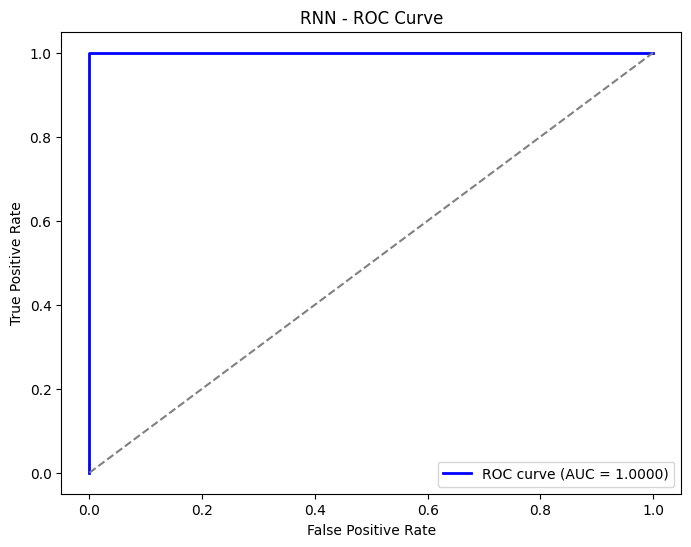

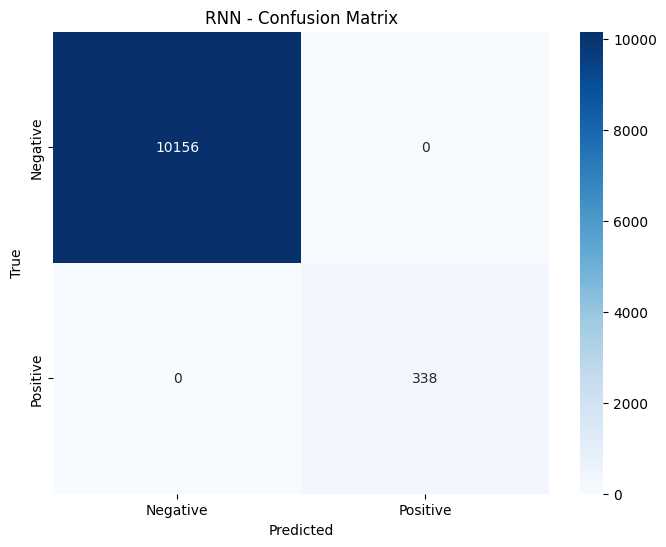

In [4]:
# RNN Modeli
print("\nEvaluating RNN Model...")
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))  # İkili sınıflandırma için sigmoid

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_scaled_3d, y_train, epochs=3, batch_size=32, validation_data=(X_test_scaled_3d, y_test))

# RNN Test başarımı
y_pred_rnn = rnn_model.predict(X_test_scaled_3d)
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)
y_pred_rnn_proba = rnn_model.predict(X_test_scaled_3d)  # predict_proba yerine predict kullanılıyor

rnn_accuracy = accuracy_score(y_test, y_pred_rnn)
rnn_precision = precision_score(y_test, y_pred_rnn)
rnn_recall = recall_score(y_test, y_pred_rnn)
rnn_f1 = f1_score(y_test, y_pred_rnn)
rnn_auc = roc_auc_score(y_test, y_pred_rnn_proba)

print(f"RNN Accuracy: {rnn_accuracy:.4f}")
print(f"RNN Precision: {rnn_precision:.4f}")
print(f"RNN Recall: {rnn_recall:.4f}")
print(f"RNN F1-Score: {rnn_f1:.4f}")
print(f"RNN AUC: {rnn_auc:.4f}")

# ROC Eğrisini çizdirme (RNN)
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn_proba)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rnn, tpr_rnn, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc_rnn:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("RNN - ROC Curve")
plt.legend(loc='lower right')
plt.show()

# Karışıklık Matrisi (RNN)
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("RNN - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Evaluating LSTM Model...
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1312/1312 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9667 - loss: 169.2146 - val_accuracy: 0.9678 - val_loss: 0.1046
Epoch 2/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9688 - loss: 0.0812 - val_accuracy: 0.9739 - val_loss: 0.0480
Epoch 3/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9815 - loss: 0.0404 - val_accuracy: 0.9411 - val_loss: 0.3468
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
LSTM Accuracy: 0.9411
LSTM Precision: 0.3536
LSTM Recall: 1.0000
LSTM F1-Score: 0.5224
LSTM AUC: 1.0000


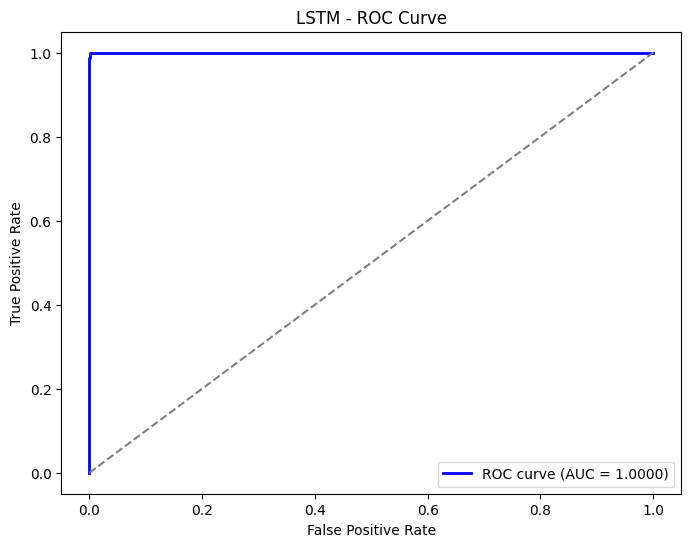

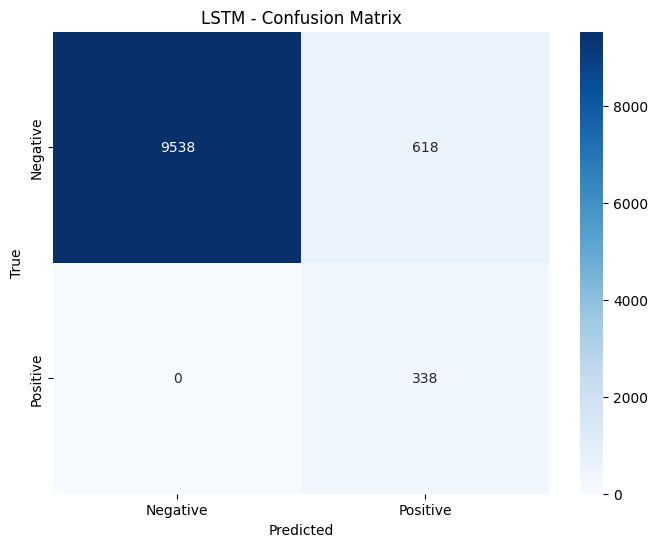

In [5]:
# LSTM Modeli
print("\nEvaluating LSTM Model...")
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_scaled_3d, y_train, epochs=3, batch_size=32, validation_data=(X_test_scaled_3d, y_test))

# LSTM Test başarımı
y_pred_lstm = lstm_model.predict(X_test_scaled_3d)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)
y_pred_lstm_proba = lstm_model.predict(X_test_scaled_3d)  # predict_proba yerine predict kullanılıyor

lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_precision = precision_score(y_test, y_pred_lstm)
lstm_recall = recall_score(y_test, y_pred_lstm)
lstm_f1 = f1_score(y_test, y_pred_lstm)
lstm_auc = roc_auc_score(y_test, y_pred_lstm_proba)

print(f"LSTM Accuracy: {lstm_accuracy:.4f}")
print(f"LSTM Precision: {lstm_precision:.4f}")
print(f"LSTM Recall: {lstm_recall:.4f}")
print(f"LSTM F1-Score: {lstm_f1:.4f}")
print(f"LSTM AUC: {lstm_auc:.4f}")

# ROC Eğrisini çizdirme (LSTM)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm_proba)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc_lstm:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("LSTM - ROC Curve")
plt.legend(loc='lower right')
plt.show()

# Karışıklık Matrisi (LSTM)
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("LSTM - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Evaluating GRU Model...
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1312/1312 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9754 - loss: 0.1235 - val_accuracy: 1.0000 - val_loss: 1.0038e-05
Epoch 2/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 1.0000 - loss: 1.2908e-05 - val_accuracy: 1.0000 - val_loss: 3.2015e-06
Epoch 3/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 1.0000 - loss: 2.1839e-06 - val_accuracy: 1.0000 - val_loss: 5.9424e-07
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
GRU Accuracy: 1.0000
GRU Precision: 1.0000
GRU Recall: 1.0000
GRU F1-Score: 1.0000
GRU AUC: 1.0000


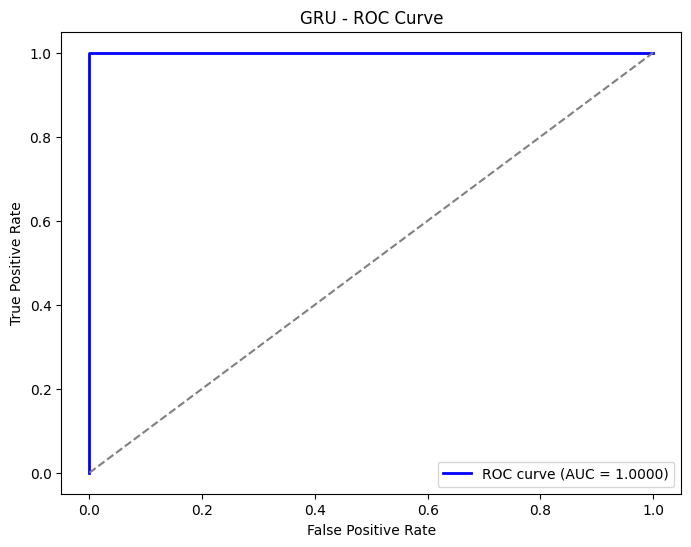

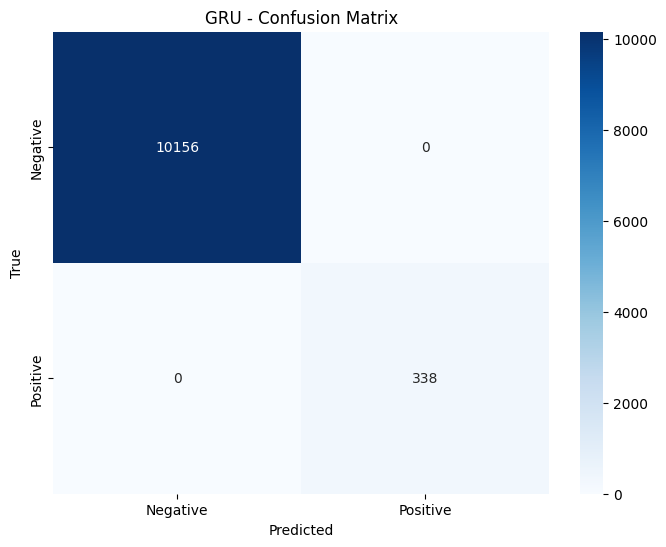

In [6]:
# GRU Modeli
print("\nEvaluating GRU Model...")
gru_model = Sequential()
gru_model.add(GRU(64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(X_train_scaled_3d, y_train, epochs=3, batch_size=32, validation_data=(X_test_scaled_3d, y_test))

# GRU Test başarımı
y_pred_gru = gru_model.predict(X_test_scaled_3d)
y_pred_gru = (y_pred_gru > 0.5).astype(int)
y_pred_gru_proba = gru_model.predict(X_test_scaled_3d)  # predict_proba yerine predict kullanılıyor

gru_accuracy = accuracy_score(y_test, y_pred_gru)
gru_precision = precision_score(y_test, y_pred_gru)
gru_recall = recall_score(y_test, y_pred_gru)
gru_f1 = f1_score(y_test, y_pred_gru)
gru_auc = roc_auc_score(y_test, y_pred_gru_proba)

print(f"GRU Accuracy: {gru_accuracy:.4f}")
print(f"GRU Precision: {gru_precision:.4f}")
print(f"GRU Recall: {gru_recall:.4f}")
print(f"GRU F1-Score: {gru_f1:.4f}")
print(f"GRU AUC: {gru_auc:.4f}")

# ROC Eğrisini çizdirme (GRU)
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_gru_proba)
roc_auc_gru = auc(fpr_gru, tpr_gru)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gru, tpr_gru, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc_gru:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("GRU - ROC Curve")
plt.legend(loc='lower right')
plt.show()

# Karışıklık Matrisi (GRU)
cm_gru = confusion_matrix(y_test, y_pred_gru)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("GRU - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Evaluating Complex CNN + BiLSTM Model...
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1312/1312 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9799 - loss: 1.7756 - val_accuracy: 0.9990 - val_loss: 0.0544
Epoch 2/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9987 - loss: 0.0394 - val_accuracy: 0.9990 - val_loss: 0.0798
Epoch 3/3
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9947 - loss: 3.9600 - val_accuracy: 0.9960 - val_loss: 1.1455
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Complex CNN + BiLSTM Accuracy: 0.9960
Complex CNN + BiLSTM Precision: 0.9837
Complex CNN + BiLSTM Recall: 0.8905
Complex CNN + BiLSTM F1-Score: 0.9348
Complex CNN + BiLSTM AUC: 0.9108


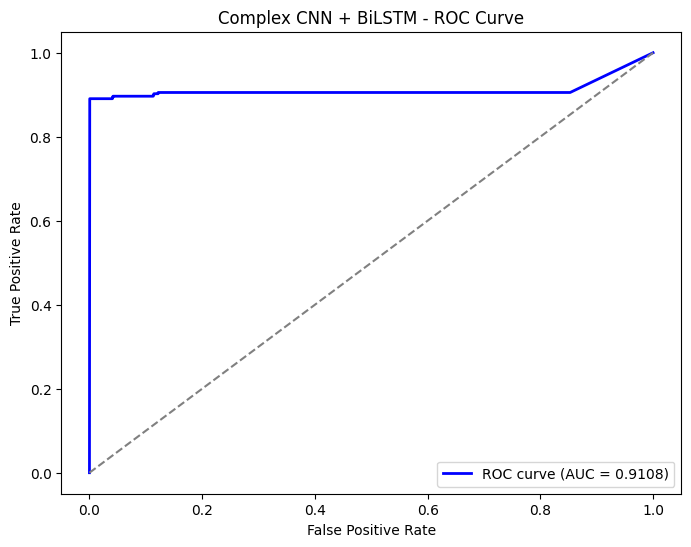

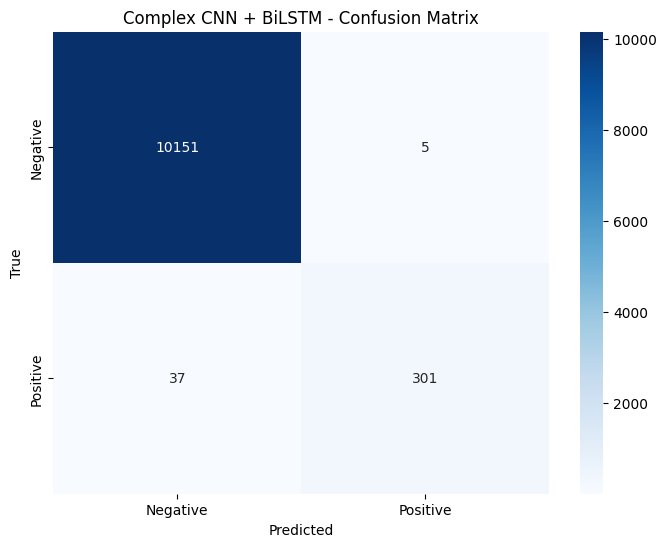

In [7]:
# Complex CNN + BiLSTM Modeli
print("\nEvaluating Complex CNN + BiLSTM Model...")
complex_model = Sequential()
complex_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled_3d.shape[1], 1)))
complex_model.add(MaxPooling1D(pool_size=2))
complex_model.add(Bidirectional(LSTM(64, activation='relu')))
complex_model.add(Dense(1, activation='sigmoid'))

complex_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
complex_model.fit(X_train_scaled_3d, y_train, epochs=3, batch_size=32, validation_data=(X_test_scaled_3d, y_test))

# Complex CNN + BiLSTM Test başarımı
y_pred_complex = complex_model.predict(X_test_scaled_3d)
y_pred_complex = (y_pred_complex > 0.5).astype(int)
y_pred_complex_proba = complex_model.predict(X_test_scaled_3d)  # predict_proba yerine predict kullanılıyor

complex_accuracy = accuracy_score(y_test, y_pred_complex)
complex_precision = precision_score(y_test, y_pred_complex)
complex_recall = recall_score(y_test, y_pred_complex)
complex_f1 = f1_score(y_test, y_pred_complex)
complex_auc = roc_auc_score(y_test, y_pred_complex_proba)

print(f"Complex CNN + BiLSTM Accuracy: {complex_accuracy:.4f}")
print(f"Complex CNN + BiLSTM Precision: {complex_precision:.4f}")
print(f"Complex CNN + BiLSTM Recall: {complex_recall:.4f}")
print(f"Complex CNN + BiLSTM F1-Score: {complex_f1:.4f}")
print(f"Complex CNN + BiLSTM AUC: {complex_auc:.4f}")

# ROC Eğrisini çizdirme (Complex CNN + BiLSTM)
fpr_complex, tpr_complex, _ = roc_curve(y_test, y_pred_complex_proba)
roc_auc_complex = auc(fpr_complex, tpr_complex)

plt.figure(figsize=(8, 6))
plt.plot(fpr_complex, tpr_complex, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc_complex:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Complex CNN + BiLSTM - ROC Curve")
plt.legend(loc='lower right')
plt.show()

# Karışıklık Matrisi (Complex CNN + BiLSTM)
cm_complex = confusion_matrix(y_test, y_pred_complex)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_complex, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Complex CNN + BiLSTM - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()